# SIO 236 - Lab I : Ground track of satellites

### Bia Villas Bôas - avillasb@ucsd.edu

In [239]:
%matplotlib inline

Loading the packages 

In [245]:
from numpy import pi, sin, cos, arccos, arcsin, arctan2, sqrt
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

Defining orbit parameters according to the given problem

In [244]:
i = 66.01*pi/180 # Inclination of TOPEX 
T = 6745.72 
we = 2*pi/86164.1 # Earth's orbital frequency
ws = 2*pi/T # Satelite's orbital frequency 
wn = we - ws*10./127 # precession frequency
we_prime = we - wn
frac = 127 
t = np.arange(0,frac*T,1)

From the equations in the lecture notes, one can determine the latitude ( $\theta$ ), and longitude ( $\phi$ ) of the ground track of a satellite as a function of time by:

$$\theta(t) = \arcsin[\sin(\omega_s t)\sin{i}]$$


$$\phi(t) = arctan2 \left[\left(-\sin(\omega^{'}_e t)\cos(\omega_s t) 
+ \cos(\omega^{'}_e t)\sin(\omega_s t)\cos(i)\right) / \left(\cos(\omega^{'}_e t)\cos(\omega_s t) + \sin(\omega^{'}_e t)\sin(\omega_s t)\cos(i)\right)    \right]$$




In [236]:
theta = arcsin(sin(ws*t)*sin(i)) # latitude in radians
top = -sin(we_prime*t)*cos(ws*t) + cos(we_prime*t)*sin(ws*t)*cos(i)
bot = cos(we_prime*t)*cos(ws*t)+sin(we_prime*t)*sin(ws*t)*cos(i) 
phi = arctan2(top,bot) # longitude in radians

# Converting back to degrees
lon = phi*180/pi 
lat = theta*180/pi



Ploting the map of the ground track of TOPEX/Poseidon after a complete cycle. 

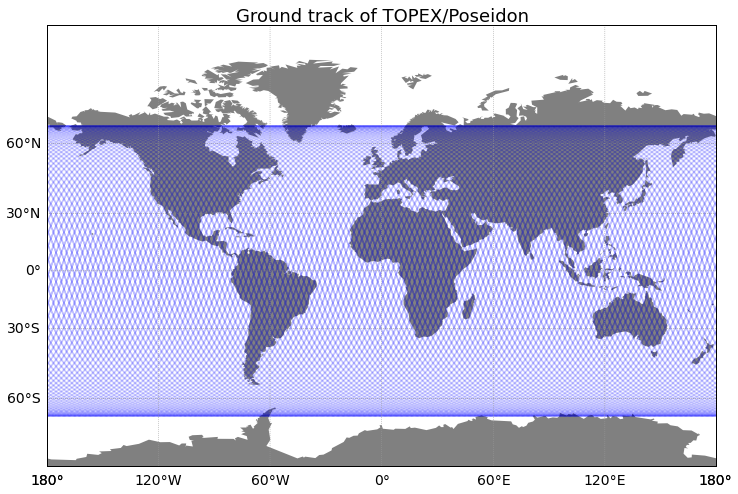

In [243]:
plt.figure(figsize=(12,14))
map = Basemap(llcrnrlon=-180,llcrnrlat=-80,urcrnrlon=180,urcrnrlat=90,projection='mill')
xm, ym = map(lon,lat)
map.fillcontinents(color='0.5', lake_color='0.5')
map.plot(xm,ym,'.',markersize=.05)
parallels = ([-60,-30,0,30,60])
map.drawparallels(parallels,linewidth=.5,labels=[1,0,0,0],fontsize=14, color = '0.5')
meridians = np.arange(-180,180,60)
map.drawmeridians(meridians,linewidth=.5,labels=[0,0,0,1],fontsize=14, color = '0.6')
plt.title('Ground track of TOPEX/Poseidon', fontsize=18)
plt.show()